# Sheet 8

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

## 1. Projection Trick

Text(0.5, 1.0, 'Visualizing Data')

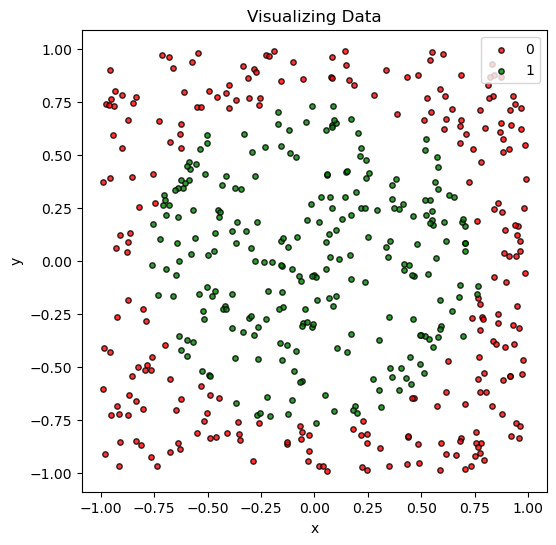

In [5]:
# Load the data
xy = np.load('data/data2d.npy')
labels = np.load('data/labels.npy')

# TODO: Plot the data
plt.figure(figsize=(6,6))
plt.scatter(xy[np.where(labels==0)][:,0],xy[np.where(labels==0)][:,1],c='r',s=15,alpha=0.8,edgecolors='k',label='0')
plt.scatter(xy[np.where(labels==1)][:,0],xy[np.where(labels==1)][:,1],c='g',s=15,alpha=0.8,edgecolors='k',label='1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right")
plt.title("Visualizing Data")

Accuracy = 55.800000000000004%


Text(0.5, 1.0, 'LOGISTIC REGRESSION')

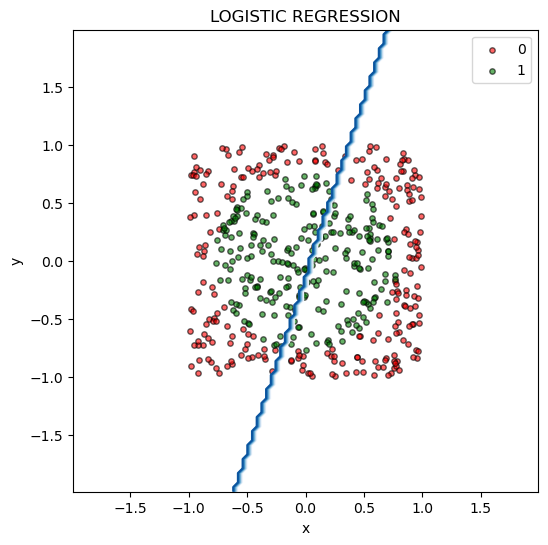

In [10]:
# TODO: fit logistic regression]
clf = LogisticRegression(random_state=0).fit(xy, labels)

# TODO: compute the accuracy
print(f"Accuracy = {clf.score(xy, labels)*100}%")

# TODO: visualize the decision boundary
from sklearn.inspection import DecisionBoundaryDisplay
plt.figure(figsize=(6,6))

ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf,
    xy,
    cmap=plt.cm.Blues,
    ax=ax,
    response_method="predict",
    plot_method="contour",
)

plt.scatter(xy[np.where(labels==0)][:,0],xy[np.where(labels==0)][:,1],c='r',s=15,alpha=0.6,edgecolors='k',label='0')
plt.scatter(xy[np.where(labels==1)][:,0],xy[np.where(labels==1)][:,1],c='g',s=15,alpha=0.6,edgecolors='k',label='1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc="upper right")
plt.title("LOGISTIC REGRESSION")

<a id="input_space"></a>

The data can be transformed to belong in a paraboloid plane(non-linear) so that we can seperate the two labels using a plane(linear). Thus we add a third component to the data using the equation:
$$
z = x^2 + y^2
$$

Text(0.5, 0.92, 'Data transformed into 3D Space')

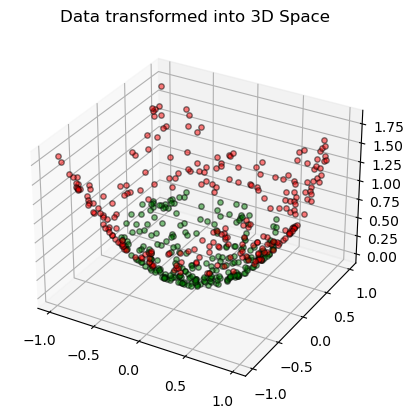

In [13]:
# TODO: Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z = xy[:,0]**2 + xy[:,1]**2
new_data = np.c_[xy,z]


# TODO: Show the enhanced data, e.g. with a 3D scatter plot 
#       (https://matplotlib.org/stable/gallery/mplot3d/scatter3d.html)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
for coord,lab in zip(new_data,labels):
    ax.scatter(coord[0], coord[1], coord[2], c = 'r' if lab==0 else 'g',s=15,alpha=0.5,edgecolors='k')

ax.set_label('x')
ax.set_label('y')
ax.set_label('z')
ax.set_title("Data transformed into 3D Space")

<a id="feature_space"></a>

In [8]:
# TODO: again, fit and evaluate logistic regression
clf = LogisticRegression(random_state=0).fit(new_data, labels)
print(f"Accuracy = {clf.score(new_data, labels)*100}%")

Accuracy = 99.0%


## (c) Describe (in words) how this problem could be solved by an MLP with a single hidden layer.

- Each perceptron in the hidden layer will create a decision boundary on the [input space](#input_space), such that, all the resulting polyhedrons formed from the whole layer are pure.
- The output layer with a non-linear activation function, such as ReLU, will create a linear decision boundary/surface in the [feature space](#feature_space) that will divide the two classes.
- This linear decision boundary/surface in the [feature space](#feature_space) will map to a non-linear decision boundary in the [input space](#input_space) that changes it's directions whenever it crosses the boundaries formed by the hidden layer, therefore segregating the classes in the input layer.

## 3. Reverse Mode Automatic Differentiation

In [15]:
from IPython.display import Image

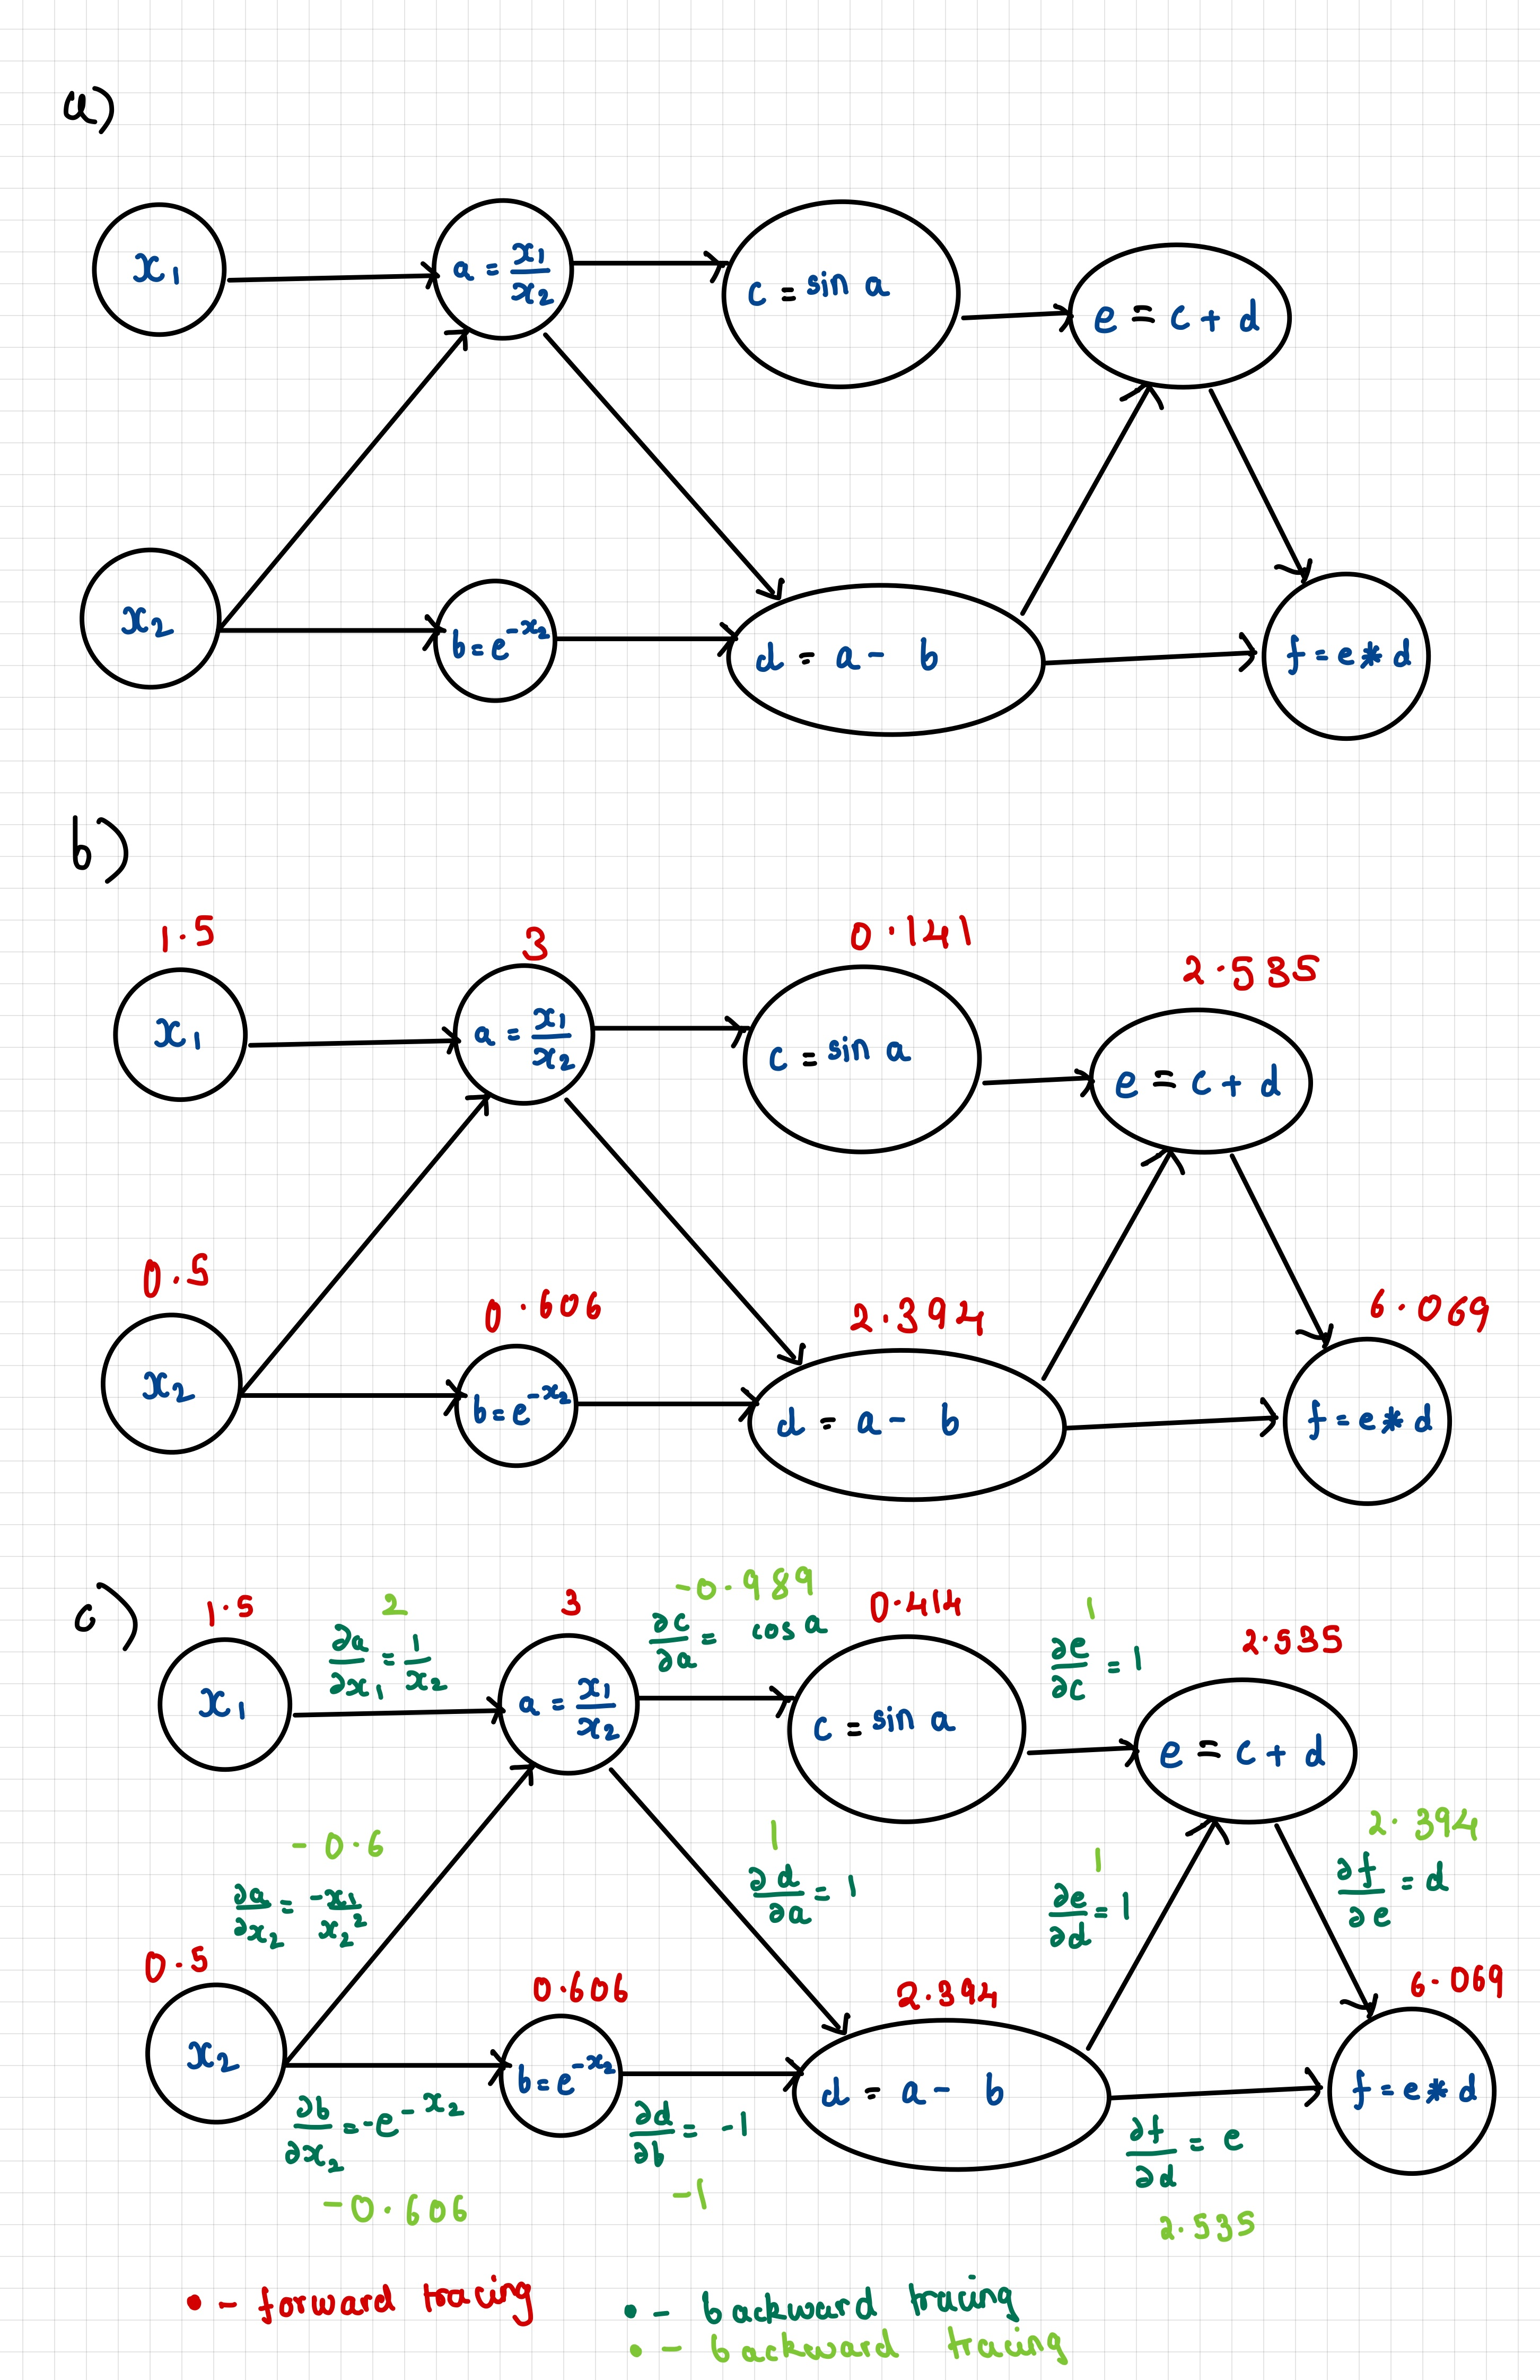

In [16]:
Image(filename='Ex8_3.jpg') 